## Deploying Machine Learning Model..

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import set_config
import joblib

### 1. Data Aquisition

In [2]:
df = pd.read_csv("datasets/advertising-withmissingdata.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,NaN,45.1,10.4
2,NaN,45.9,69.3,9.3
3,151.5,41.3,NaN,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,NaN,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,NaN,25.5


### 2. EDA

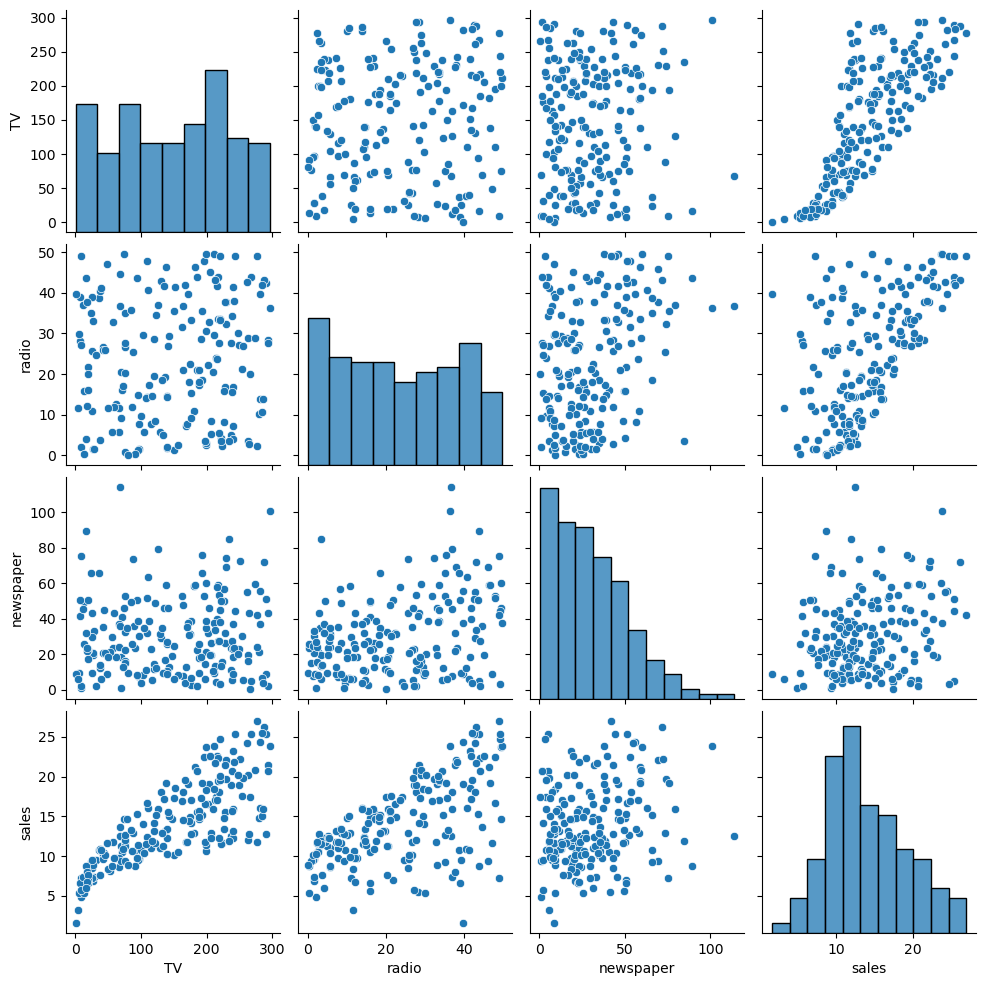

In [3]:
sns.pairplot(df)

### 3. Data Preprocessing and Feature Engineering

In [4]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [5]:
df.isnull().sum()

TV            4
radio        10
newspaper     2
sales         0
dtype: int64

### 4. Choose Right Estimator.

- i. Linearity
- ii. Independence
- iii. Homoscedesticity
- iv. Normality

### 5. Pipelined Model

In [6]:
pipeline_model = Pipeline(steps=
                          [
                              ('si', SimpleImputer(missing_values=np.nan, strategy='mean')),
                              ('Ss', StandardScaler()),
                              ('lr', LinearRegression())
                          ]
                          )

### Train Test Split with Hold Out Set..

In [7]:
X = df.drop('sales', axis=1)
y = df['sales']
len(X), len(y)

(200, 200)

In [8]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, random_state=54)
len(X_train), len(X_holdout)

(180, 20)

In [9]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X_train, y_train, test_size=0.2, random_state=54)
len(X_Train), len(X_Test)

(144, 36)

### Fit/Train the Pipeline Model...

In [10]:
pipeline_model.fit(X_Train, y_Train)

Pipeline(steps=[('si', SimpleImputer()), ('Ss', StandardScaler()),
                ('lr', LinearRegression())])

### Evaluate Model...

In [11]:
mae = mean_absolute_error(y_Test,pipeline_model.predict(X_Test))
mse = mean_squared_error(y_Test,pipeline_model.predict(X_Test))**0.5
r2 = pipeline_model.score(X_Test, y_Test)
print("mae : ", mae)
print("mse : ", mse)
print("r2: ", r2)

mae :  1.4877902273612003
mse :  1.7633420155499469
r2:  0.9043782054522596


In [12]:
print(cross_val_score(pipeline_model, X_Test, y_Test, cv=5, scoring='r2').mean())

0.7857135971259901


### Holdout Set Evaluation

In [13]:
maeh = mean_absolute_error(y_holdout,pipeline_model.predict(X_holdout))
mseh = mean_squared_error(y_holdout,pipeline_model.predict(X_holdout))**0.5
r2h = pipeline_model.score(X_holdout, y_holdout)
print("mae : ", maeh)
print("mse : ", mseh)
print("r2: ", r2h)

mae :  0.9412062385583486
mse :  1.34748502470313
r2:  0.9038605605499659


## 6. Fit the Model on entire dataset 

In [14]:
pipeline_model.fit(X, y)

Pipeline(steps=[('si', SimpleImputer()), ('Ss', StandardScaler()),
                ('lr', LinearRegression())])

## 7. Save Model (pickle file).

In [15]:
joblib.dump(pipeline_model, 'lr_model_adv.pkl')

['lr_model_adv.pkl']

## 8. Load model and predict on new data

In [17]:
loaded_model = joblib.load("lr_model_adv.pkl")

In [21]:
print("Predicted Sale : ",loaded_model.predict(np.array([[60,50,40]])))

Predicted Sale :  [14.97699658]


C:\Users\ASCC\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# A)  STREAMLIT